##### Problem 1 Merton model again

Assume a Merton model for default with a constant risk free rate of r and an initial firm value of \$10,000,000. The firm issued a zero coupon bond with face value B that matures at time T:
$$ dV=\mu V dt + \sigma v dW$$
$$\mu =0.03$$
$$\sigma = 0.15$$
$$ r = 0.02$$
$$ V_0 = 15000000 $$
$$ T=5 $$

What is the survival probability1 function for time T as a function of B? Give its formula
and graph it as a function of B.

What is the current value of the equity and of the issued zero coupon bond? Give its
formula and graph it as a function of B.

In the previous problem, the 5 year survival probability is 0.92728. What value of B
gives the same 5 year survival probability?

The survival probabilty function for time T as a function of B is the probability that $V_T$>B.From the Merton model, it is $$ s=1-\phi(-d_2)$$
$$d_1=\frac{log(\frac{V_0}{B})+(r+\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$$
$$d_2=\frac{log(\frac{V_0}{B})+(r-\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$$

Here $d_2 =\frac{log(\frac{15000000}{B})+(0.02-\frac{0.15^2}{2})5}{0.15\sqrt{5}}=\frac{log(\frac{15000000}{B})+0.043750000000000004}{0.33541019662496846}$

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5,0,'Debt')

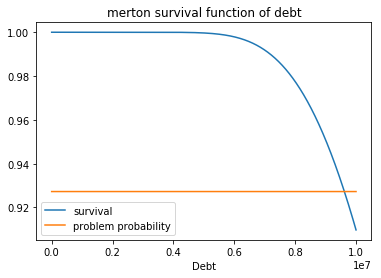

In [43]:
def merton(b):
    S=1-ss.norm.cdf(-(np.log(15000000/b)+0.04375)/0.33541019)
    return S
b=np.arange(0, 10**7, 10)
Debt=merton(b)
prob=[0.92728]*1000000
plt.plot(b,Debt)
plt.plot(b,prob)
plt.legend(("survival","problem probability"))
plt.title('merton survival function of debt')
plt.xlabel("Debt")

The debt is the value of receiving a risk free B at time T minus a put on the assets with strike B:
By the formula:
$$ S(B)=\phi(d_1(B))V_0-\phi(d_2(B))Be^{-rT}$$
$$ D(B)=(V_0-S(B))$$

In [20]:
def stock(b):
    b=np.array(b)
    stockm=ss.norm.cdf((np.log(15000000/b)+0.15625)/0.33541019)*15000000-ss.norm.cdf((np.log(15000000/b)+0.04375)/0.33541019)*b*np.exp(-0.1)
    return stockm
def bond(stockobj):
    bond=15000000-stockobj
    return bond

In [37]:
b1=np.arange(0, 3*10**7, 1000)
stock1=stock(b1)
stock1
bond1=bond(stock1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Stock and Bond vs Debt')

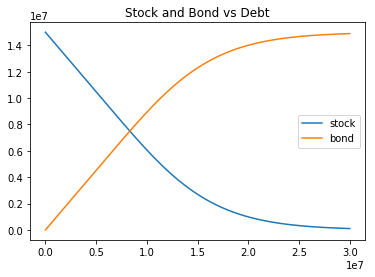

In [41]:
plt.plot(b1,stock1)
plt.plot(b1,bond1)
plt.legend(("stock","bond"))
plt.title('Stock and Bond vs Debt')
plt.xlabel("Debt")

Text(0.5,0,'Debt')

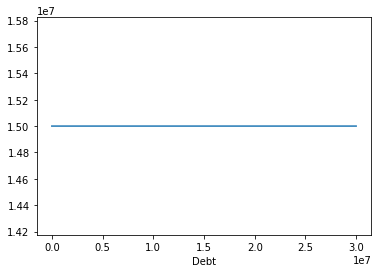

In [44]:
firm=bond1+stock1
plt.plot(b1,firm)
plt.xlabel("Debt")

###### Problem 2 CVA

###### (a) What is “CVA”?

CVA is the credit valuation adjustment applied to an OTC derivative contract (or a set of contracts under a netting agreement). It is the market value of the embedded default risk.

###### (b) Give the general formula for computing CVA and give the assumptions under which it holds.

Let $\tau$ be the time at which the counterparty defaults, $V(t)$ be the value of the set of contracts under the netting agreement at time $t$, and $R$ be the recovery rate.
The loss at default time $\tau$ is:
$$(1-R)max(V_\tau,0)$$

If $max(V_\tau,0)/N_t$(the value of the call) and $\delta(t-\tau)$(the default event) are independent, then the expectation factors and the CVA is:
$$CVA=(1-R)\int_{0}^{T}S(t)p(t)dt$$
where S(t) is the current value of the swaption to enter into the remainder of the swap attime t,and p(t)is the default time probability density function.

Discretization: Divide the time interval $[0,T]$,into periods $[t_i,t_{i+1}]$ and select $\bar{t_i} \in [t_i,t_{i+1}]$ then,
$$CVA=(1-R)\int_{0}^{T}S(t)p(t)dt$$
$$\approx (1-R)\sum S(\bar{t_i})\bar{p}(t_i)$$ 
where $\bar{p}(t_i)$=$\int_{t_i}^{t_{i+1}}p(t)dt$=$s(t_i)-s(t_{i+1})$ is the probabiliry of defaulting in interval$[t_i,t_{i+1}]$

Assumptions:

There is no collateralization

$R$ is a known constant

$Q$ is the equivalent martingale measure with respect to $num\acute{e}raire$ $N$

$1_{\tau<t}$ and $max(V(t),0)/N(t)$ are independent with respect to $Q$

###### (c) What is wrong way risk?

Wrong way risk is when:default and portfolio values are not independent and Default probabilities tend to increase when the portfolio value increases.

###### (d) Give an example of wrong way risk.

Example:entering into an oil swap with Exxon where Exxon pays a fixed amount and you pay the market price of oil.The contract value goes up when oil prices drop,your swap's value goes up and Exxon needs to pay more. However when the oil prices, Exxon make less money on its business and it is exactly the time when Exxon is most likely to default.

#### Problem 3 CVA calcs

###### Consider a discrete world in which at time zero, the stock S and the bond B each cost \$100 At the future time T, the stock is either worth \$150 with probability 0.8 and or \$50 with probability 0.2.In both cases, the bond still costs \$100 You enter into a swap with a counterparty. At time T, you will pay him the cost of the stock, and he will pay you the cost of the bond.

##### (a) Assuming no arbitrage, if the chance of the counterparty defaulting is zero, what is the price of this contract?

We can immediately see that a swap in time zero is worth zero. We can use the pricing formula to calculate and prove.

Using bond as a $num\acute{e}raire$
$\frac{S}{B} = 1$ at time zero, and at time T, $\frac{S}{B}$ will either be 150/100 for probability 0.8 or 50/100 for probability 0.2. In the risk-neutral world,$\frac{S}{B}$ will either be $p$ for probability $1-p$ or 50/100 for probability 0.2. Of course now, S/B must be a martingale and use the property of martingale we get:
$$\frac{S_0}{B_0} =E^Q[\frac{S_t}{B_t}]$$
$$1=1.5p+0.5(1-p)$$
find $p$ =0.5

Now price for this contract:
$$N_0E^Q[\frac{V_t}{N_T}]=100*(\frac{(100-150)\times p}{100}+\frac{(100-50)\times(1-p)}{100})=0$$

##### Suppose now that there is a chance that your counterparty defaults and only pays 60% of the value of the contract (assuming he owes you anything at all). According to your analysis of the cost of buying default protection, you have computed that there’s a 40% risk neutral chance of default, and that the default is independent of the stock price.What is the value of this risky contract and what is the value of the CVA?

The loss at default time will be $$(1-R)max(V_T,0)$$
when stock is 150 the loss at default time will be 0, and when stock is 50, it will be 0.4$\times$50=20

$$CVA=N_0E[(1-R)max(V_T,0)/N_T]\times 0.4$$
$$=100\times0.4\times(0\times p/100)+(50/100)\times(1-p)\times 0.4$$
$$=40\times0.5\times0.5\times0.4$$
$$=4$$

The CVA is \$4, and the price of the risky contract = the price of the risk free contract - CVA, equals \$-4.

###### Problem 4

In [98]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp
from scipy.stats import norm
XOM = pd.read_csv("~/Desktop/XOM-bloomberg.csv", usecols = ['Dates','PX_LAST'])
XOM['Dates'] = pd.to_datetime(XOM.Dates).dt.date
XOM = XOM.set_index('Dates')
INTC = pd.read_csv("~/Desktop/INTC-bloomberg.csv", usecols = ['Dates','PX_LAST'])
INTC['Dates'] = pd.to_datetime(INTC.Dates).dt.date
INTC = INTC.set_index('Dates')

In [101]:
### GBM of VaR and ES
def GBMVESHORT(price, time, size,S0,T,p1,p2): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = -(S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu-pow(vol,2)/2)*T))
    es=(0.975*S0 * (1 - np.exp(mu *T)/(1-0.025) * ss.norm.cdf(ss.norm.ppf(1-0.025) - T**(0.5)*vol))-S0 * (1 - np.exp(mu *T)/(1) * ss.norm.cdf(ss.norm.ppf(1) - T**(0.5)*vol)))/(0.025)
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para

def GBMVE(price, time, size,S0,T,p1,p2): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu-pow(vol,2)/2)*T)
    es = S0 * (1 - np.exp(mu *T)/(1-p2) * ss.norm.cdf(ss.norm.ppf(1-p2) - T**(0.5)*vol))
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


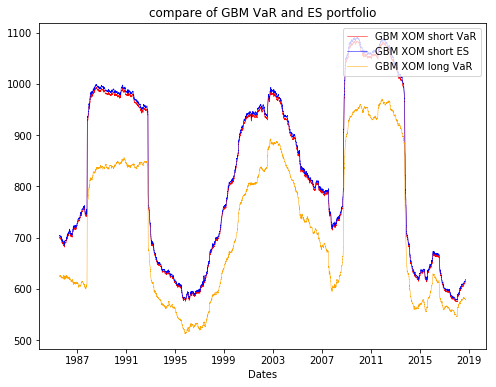

In [102]:
### XOM
GBMSHORT=GBMVESHORT(XOM,1/252,5*252,10000,5/252,0.01,0.975)
GBMlong=GBMVE(XOM,1/252,5*252,10000,5/252,0.99,0.975)
GBMlongvar=GBMlong.iloc[:,3]
GBMlonges=GBMlong.iloc[:4]
GBMVARSHORT=GBMSHORT.iloc[:,3]
GBMESSHORT=GBMSHORT.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARSHORT.plot(color='r',linewidth = 0.5, label="GBM XOM short VaR")
GBMESSHORT.plot(color='b',linewidth = 0.5, label="GBM XOM short ES")
GBMlongvar.plot(color='orange',linewidth = 0.5, label="GBM XOM long VaR")
plt.legend(loc='upper right')
plt.title('XOM:compare of GBM VaR and ES portfolio')
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


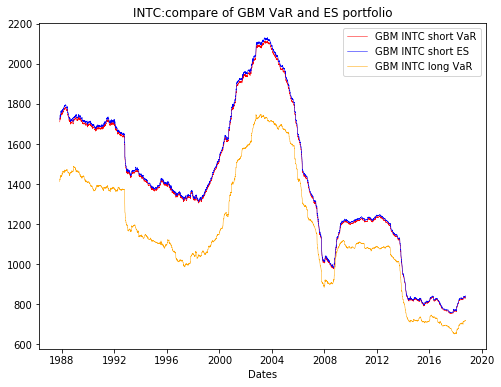

In [103]:
### INTC
GBMSHORT=GBMVESHORT(INTC,1/252,5*252,10000,5/252,0.01,0.975)
GBMlong=GBMVE(INTC,1/252,5*252,10000,5/252,0.99,0.975)
GBMlongvar=GBMlong.iloc[:,3]
GBMlonges=GBMlong.iloc[:4]
GBMVARSHORT=GBMSHORT.iloc[:,3]
GBMESSHORT=GBMSHORT.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARSHORT.plot(color='r',linewidth = 0.5, label="GBM INTC short VaR")
GBMESSHORT.plot(color='b',linewidth = 0.5, label="GBM INTC short ES")
GBMlongvar.plot(color='orange',linewidth = 0.5, label="GBM INTC long VaR")
plt.legend(loc='upper right')
plt.title('INTC:compare of GBM VaR and ES portfolio')
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


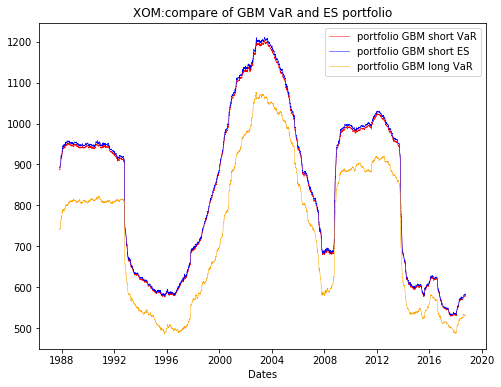

In [108]:
### PORTFOLIO
porttwostock = pd.concat([XOM, INTC], axis = 1, join = 'inner')
porttwostock['Portfolio'] =porttwostock.iloc[:, 1]*200+ porttwostock.iloc[:, 0]*156
GBMSHORTp=GBMVESHORT(porttwostock['Portfolio'],1/252,5*252,10000,5/252,0.01,0.975)
GBMlongp=GBMVE(porttwostock['Portfolio'],1/252,5*252,10000,5/252,0.99,0.975)
GBMlongvarp=GBMlongp.iloc[:,3]
GBMlongesp=GBMlongp.iloc[:4]
GBMVARSHORTp=GBMSHORTp.iloc[:,3]
GBMESSHORTp=GBMSHORTp.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARSHORTp.plot(color='r',linewidth = 0.5, label="portfolio GBM short VaR")
GBMESSHORTp.plot(color='b',linewidth = 0.5, label="portfolio GBM short ES")
GBMlongvarp.plot(color='orange',linewidth = 0.5, label="portfolio GBM long VaR")
plt.legend(loc='upper right')
plt.title('XOM:compare of GBM VaR and ES portfolio')
plt.show()

In [151]:
random=[]
for i in range(GBMSHORT.shape[0]):
    mcmc=norm.ppf(np.random.rand())
    random.append(mcmc)
def GBMMTshort(price, time, size,S0,T,p1,p2,random): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    eps = vol*random
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = -(S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu+eps-pow(vol,2)/2)*T))
    es = (0.975*S0*(1 - np.exp((mu+eps)*T)/(1-0.025) * ss.norm.cdf(ss.norm.ppf(1-0.025) - T**(0.5)*vol))-S0*(1-np.exp((mu+eps)*T)/(1)*ss.norm.cdf(ss.norm.ppf(1)-T**(0.5)*vol)))/(0.025)
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para
GBMMTp=GBMMTshort(porttwostock['Portfolio'],1/252,5*252,10000,5/252,0.01,0.975,random)


/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


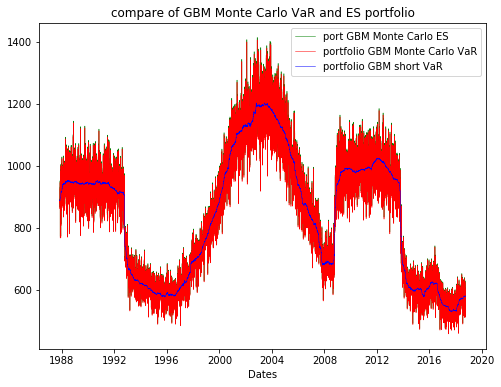

In [150]:
fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,4].plot(color='green',linewidth = 0.5, label="port GBM Monte Carlo ES")
GBMMTp.iloc[:,3].plot(color='r',linewidth = 0.5, label="portfolio GBM Monte Carlo VaR")
GBMVARSHORTp.plot(color='b',linewidth = 0.5, label="portfolio GBM short VaR")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo VaR and ES portfolio')
plt.show()

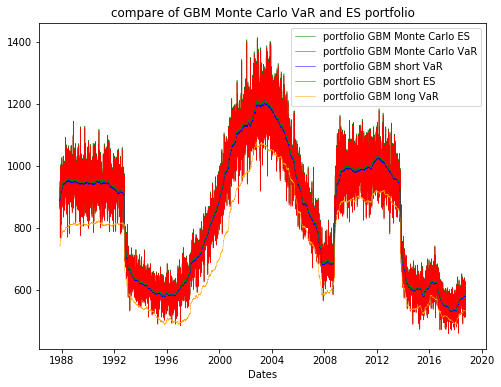

In [149]:
fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,4].plot(color='green',linewidth = 0.5, label="portfolio GBM Monte Carlo ES")
GBMMTp.iloc[:,3].plot(color='r',linewidth = 0.5, label="portfolio GBM Monte Carlo VaR")
GBMVARSHORTp.plot(color='blue',linewidth = 0.5, label="portfolio GBM short VaR")
GBMESSHORTp.plot(color='green',linewidth = 0.5, label="portfolio GBM short ES")
GBMlongvarp.plot(color='orange',linewidth = 0.5, label="portfolio GBM long VaR")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo VaR and ES portfolio')
plt.show()

###### Problem 5 Short portfolio, formula ES

Work out a formula for the ES of a short position in a portfolio following GBM. Use it to compare the 97.5% ES on a short position to the 99% VaRs computed using formulas in the previous problem (i.e. - for E, I and P across history calibrated to the last 5 years of data, equally weighted).
Are the 97.5% ESs and 99% VaRs on short portfolios close to each other?

The loss of a short possion on a stock S at time t is $S_t-S_0$
Recall the formula of ES is $ES(S_t-S_0,p)=\frac{1}{1-p}\int_{VaR(S_t-S_0,p)}^{\infty}dP(S_t-S_0)$
$ES[S_t-S_0,p]=\frac{1}{1-p}\int_{S_0+VaR(S_t-S_0,p)}^{\infty}dP(S_t)$(we change the part in the integral probability density function)
$$\frac{1}{1-p}\int_{0}^{\infty}S_t-S_0dP(S_t)-\frac{1}{1-p}\int_{0}^{S_0+VaR(S_t-S_0,p)}S_t-S_0dP(S_t)$$
$$= \frac{1}{1-p}E[S_t-S_0]-\frac{1}{1-p}\int_{0}^{S_0+VaR(S_t-S_0,p)}S_t-S_0dP(S_t)$$

$E[S_t-S_0]$=$ES[S_t-S_0,0]$=$ES[S_0-S_t,0]$ which is the expected shortfall to long a stock S
$$\frac{1}{1-p}\int_{0}^{S_0+VaR(S_t-S_0,p)}S_t-S_0dP(S_t)$$
$$=-\frac{1}{1-p}\int_{0}^{S_0+VaR(S_t-S_0,p)}S_0-S_tdP(S_t)$$
since $$VaR(S_t-S_0,p)=-VaR(S_0-S_t,1-p)$$
$$=-\frac{1}{1-p}\int_{0}^{S_0+VaR(S_t-S_0,p)}S_0-S_tdP(S_t)$$
$$=-\frac{1}{1-p}\int_{0}^{S_0-VaR(S_0-S_t,1-p)}S_0-S_tdP(S_t)$$
$$=-\frac{p}{1-p}ES[S_t-S_0,1-p]$$
Conclude that:
$$ES[S_t-S_0,p]=\frac{pES[S_0-S_t,1-p]-ES[S_0-S_t]}{1-p}$$

Compare of 97.5% Formula ES and 99% Formula VaR

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


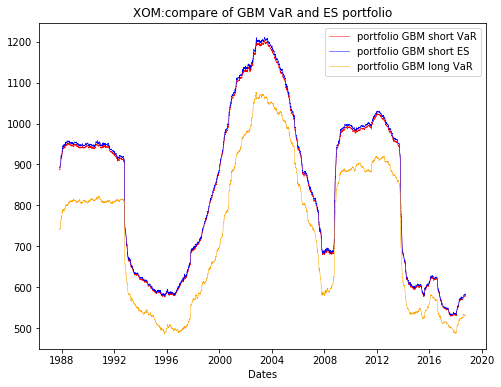

In [130]:
### PORTFOLIO
porttwostock = pd.concat([XOM, INTC], axis = 1, join = 'inner')
porttwostock['Portfolio'] =porttwostock.iloc[:, 1]*200+ porttwostock.iloc[:, 0]*156
GBMSHORTp=GBMVESHORT(porttwostock['Portfolio'],1/252,5*252,10000,5/252,0.01,0.975)
GBMlongp=GBMVE(porttwostock['Portfolio'],1/252,5*252,10000,5/252,0.99,0.975)
GBMlongvarp=GBMlongp.iloc[:,3]
GBMlongesp=GBMlongp.iloc[:4]
GBMVARSHORTp=GBMSHORTp.iloc[:,3]
GBMESSHORTp=GBMSHORTp.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARSHORTp.plot(color='r',linewidth = 0.5, label="portfolio GBM short VaR")
GBMESSHORTp.plot(color='b',linewidth = 0.5, label="portfolio GBM short ES")
GBMlongvarp.plot(color='orange',linewidth = 0.5, label="portfolio GBM long VaR")
plt.legend(loc='upper right')
plt.title('XOM:compare of GBM VaR and ES portfolio')
plt.show()

The short positions have substantially larger downside, and hence larger VaRs than the long portfolio.

The 99% VaRs and 97.5% ESs from the same model are still extremely close.